# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

from HANKStickyModel import HANKStickyModelClass

In [2]:
# model = HANKStickyModelClass(name='test')
model = HANKStickyModelClass(name='baseline_2602', par = {'beta_mean': 0.9988,
                                                         'sigma_e': 0.36})

In [3]:
# model2 = HANKStickyModelClass(name='test')
# model2.load()
# for key, value in model2.par.__dict__.items():
#     model.par.__dict__[key] = value
# for key, value in model2.ss.__dict__.items():
#     model.ss.__dict__[key] = value

In [4]:
# model.load()
model.find_ss(do_print=True)

find beta for market clearing
 [beta, sigma_e] = [  0.998800000000,   0.360000000000] -> [ss.clearing_Y =   0.000231564242, ss.clearing_MPC =  -0.003893598190] [14.3 secs]
 [beta, sigma_e] = [  0.998800000000,   0.360000000000] -> [ss.clearing_Y =   0.000231564242, ss.clearing_MPC =  -0.003893598190] [9.1 secs]
 [beta, sigma_e] = [  0.998800000000,   0.360000000000] -> [ss.clearing_Y =   0.000231564242, ss.clearing_MPC =  -0.003893598190] [8.7 secs]
 [beta, sigma_e] = [  0.998800014883,   0.360000000000] -> [ss.clearing_Y =   0.000231505769, ss.clearing_MPC =  -0.003892680925] [8.9 secs]
 [beta, sigma_e] = [  0.998800000000,   0.360000005364] -> [ss.clearing_Y =   0.000231563740, ss.clearing_MPC =  -0.003893593267] [8.8 secs]
 [beta, sigma_e] = [  0.998870226555,   0.359526595375] -> [ss.clearing_Y =  -0.000003386733, ss.clearing_MPC =   0.000022871562] [8.8 secs]
 [beta, sigma_e] = [  0.998870675861,   0.359471319250] -> [ss.clearing_Y =   0.000000061321, ss.clearing_MPC =   0.0000011

In [5]:
# model.name = 'baseline_0103'
# model.save()
# print(f'model saved under name {model.name}')

In [6]:
ss = model.ss
par = model.par

In [18]:
model.par.phi_G = 0.0
model.par.phi_pi = 0.0
model.blocks = [
            'blocks.production_firm',
            'blocks.price_setters',
            'blocks.mutual_fund',
            'blocks.government_constant_B',
            'hh',
            'blocks.union',
            'blocks.taylor',
            'blocks.invest_residual',
            'blocks.fisher',
            'blocks.real_wage',
            'blocks.market_clearing']

model.par.rho_eg = 0.85
model.par.jump_eg = 0.00
model.par.jump_eg_transfer = 0.0
model.par.jump_em = 0.00025
model.par.rho_em = 0.6
# model.par.rho_eg = 0.85
# model.par.jump_eg = 0.01
# model.par.jump_eg_transfer = 0.0
# model.par.jump_em = 0.0
delta_G = model.par.jump_eg * model.par.rho_eg ** np.arange(model.par.T)
print(f'Shock with parameters jump = {model.par.jump_eg}, rho = {model.par.rho_eg} leads to a total spending increase of {delta_G.sum()*100:.2f}%')

Shock with parameters jump = 0.0, rho = 0.85 leads to a total spending increase of 0.00%


In [8]:
model.compute_jacs(do_print=True)
# model._compute_jac(inputs='unknowns',do_print=True)
# model._compute_jac(inputs='shocks',do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for eg_transfer     in 6.6 secs
curly_Y and curly_D calculated for ra              in 6.9 secs
curly_Y and curly_D calculated for rl              in 6.8 secs
curly_Y and curly_D calculated for tau             in 6.7 secs
curly_Y and curly_D calculated for wN              in 6.7 secs
curly_E calculated in 3.9 secs
builiding blocks combined in 2.9 secs
household Jacobian computed in 40.6 secs

full Jacobians:
full Jacobian to unknowns computed in 8.7 secs [in evaluate_blocks(): 3.1 secs]
full Jacobian to shocks computed in 4.5 secs [in evaluate_blocks(): 2.2 secs]


In [9]:
# model.par.tol_broyden = 1e-8
# model.find_transition_path(shocks=['eg'], do_print=True, do_print_unknowns=False)

In [19]:
model.find_IRFs(shocks=['em'])

### shocks ###


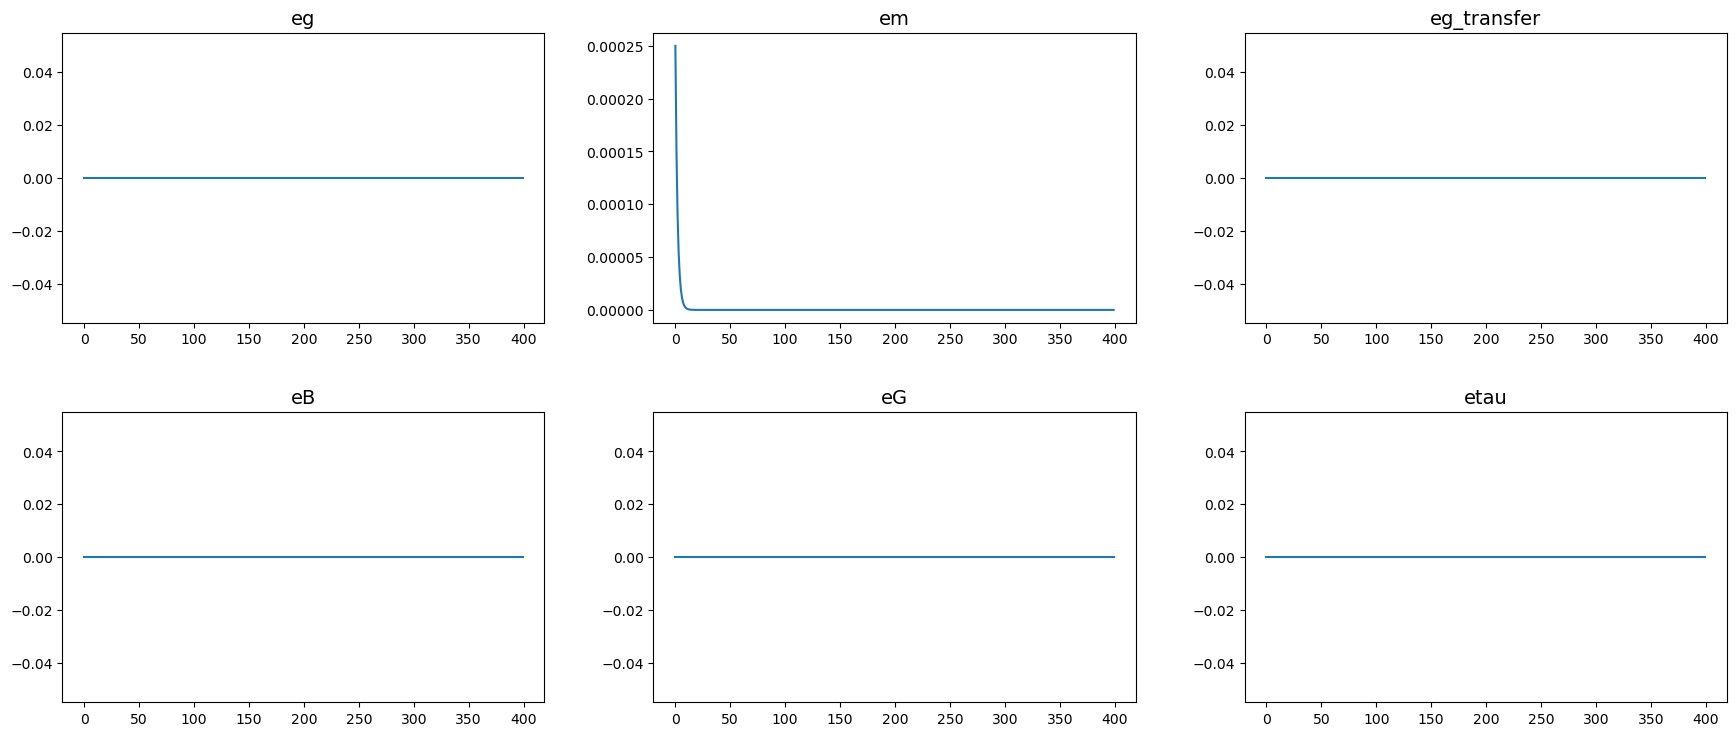


### varnames ###


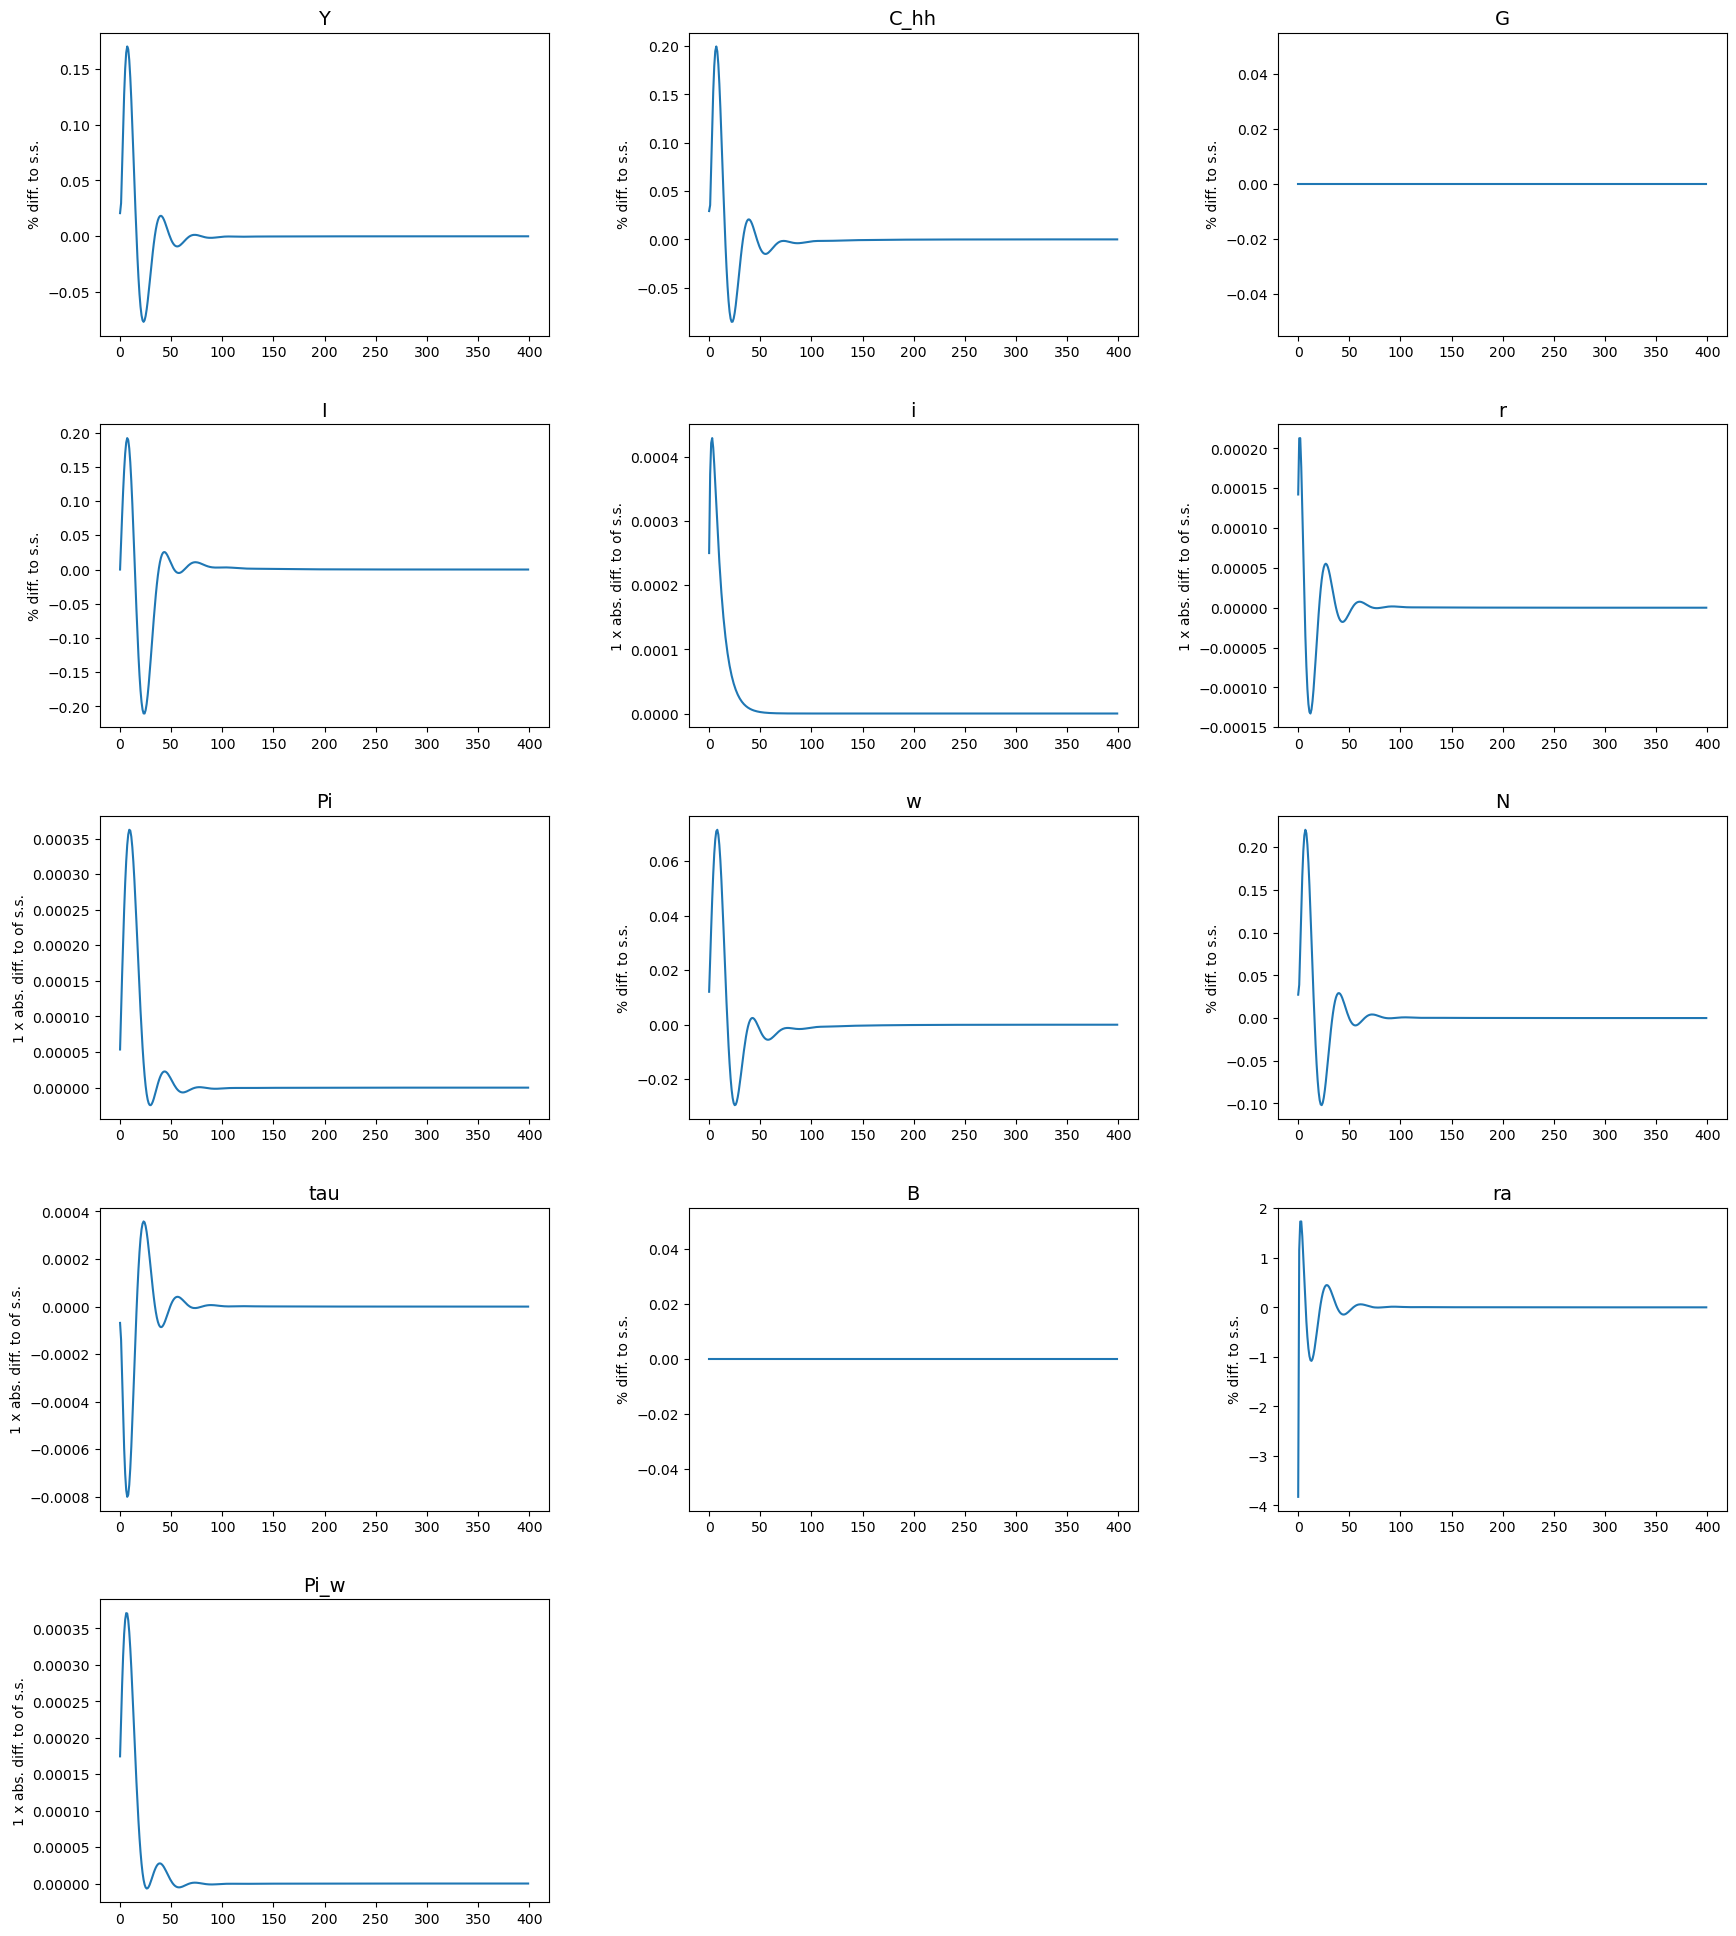


### tagets ###


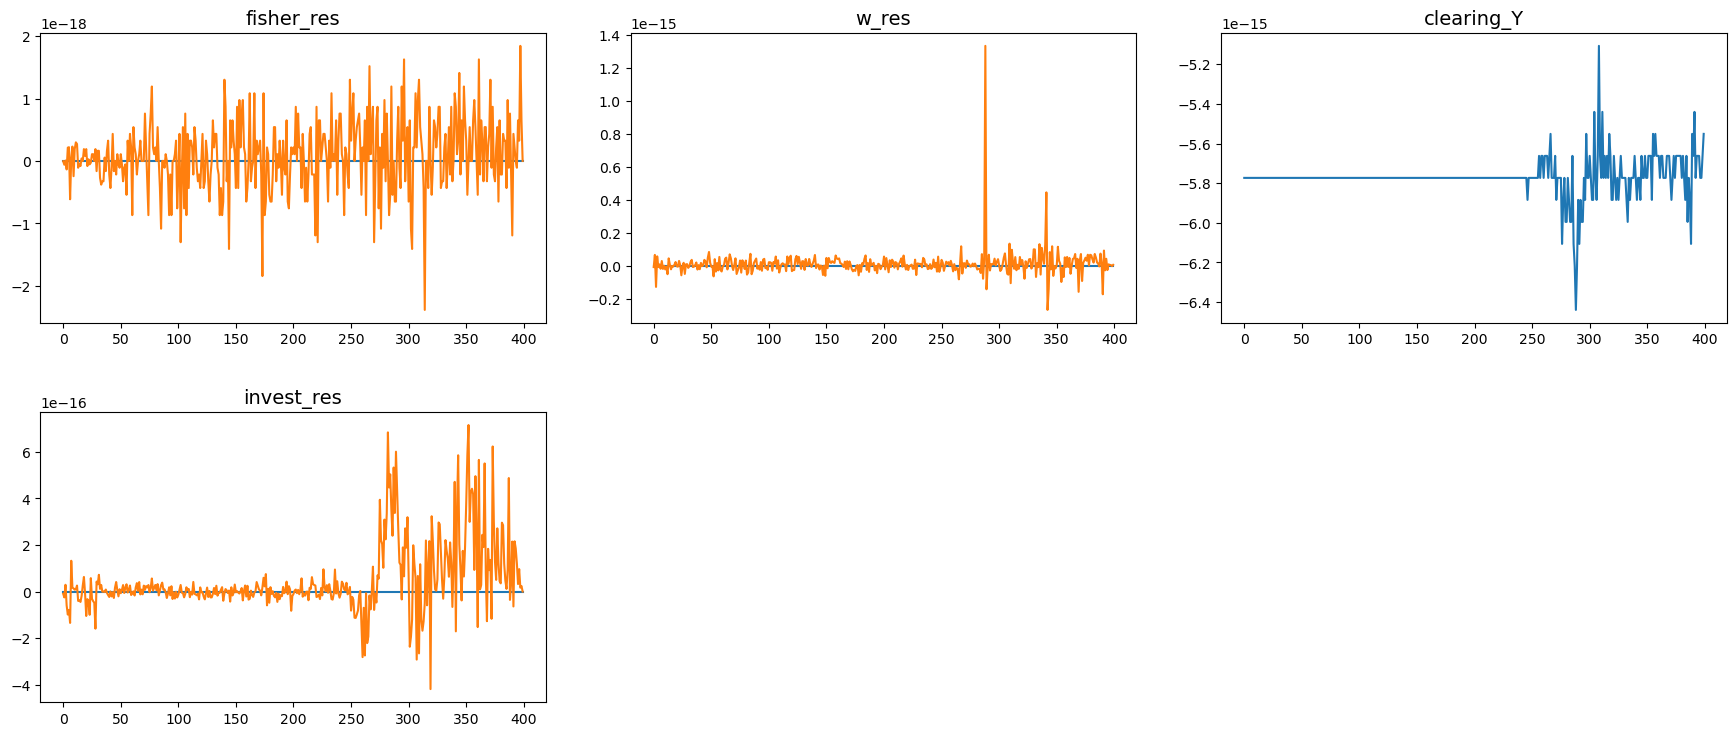


### shocks ###


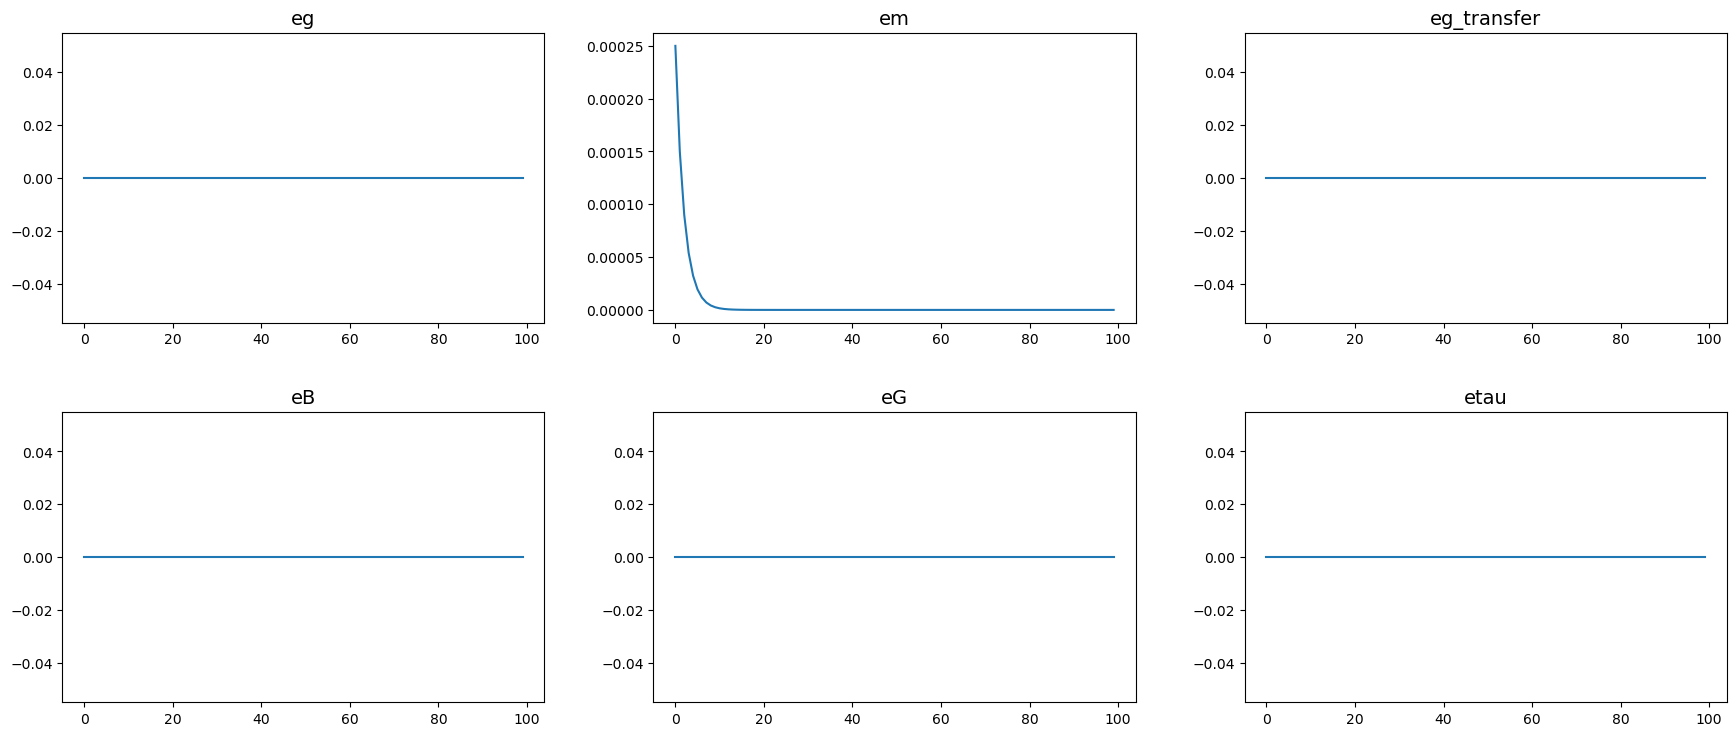


### varnames ###


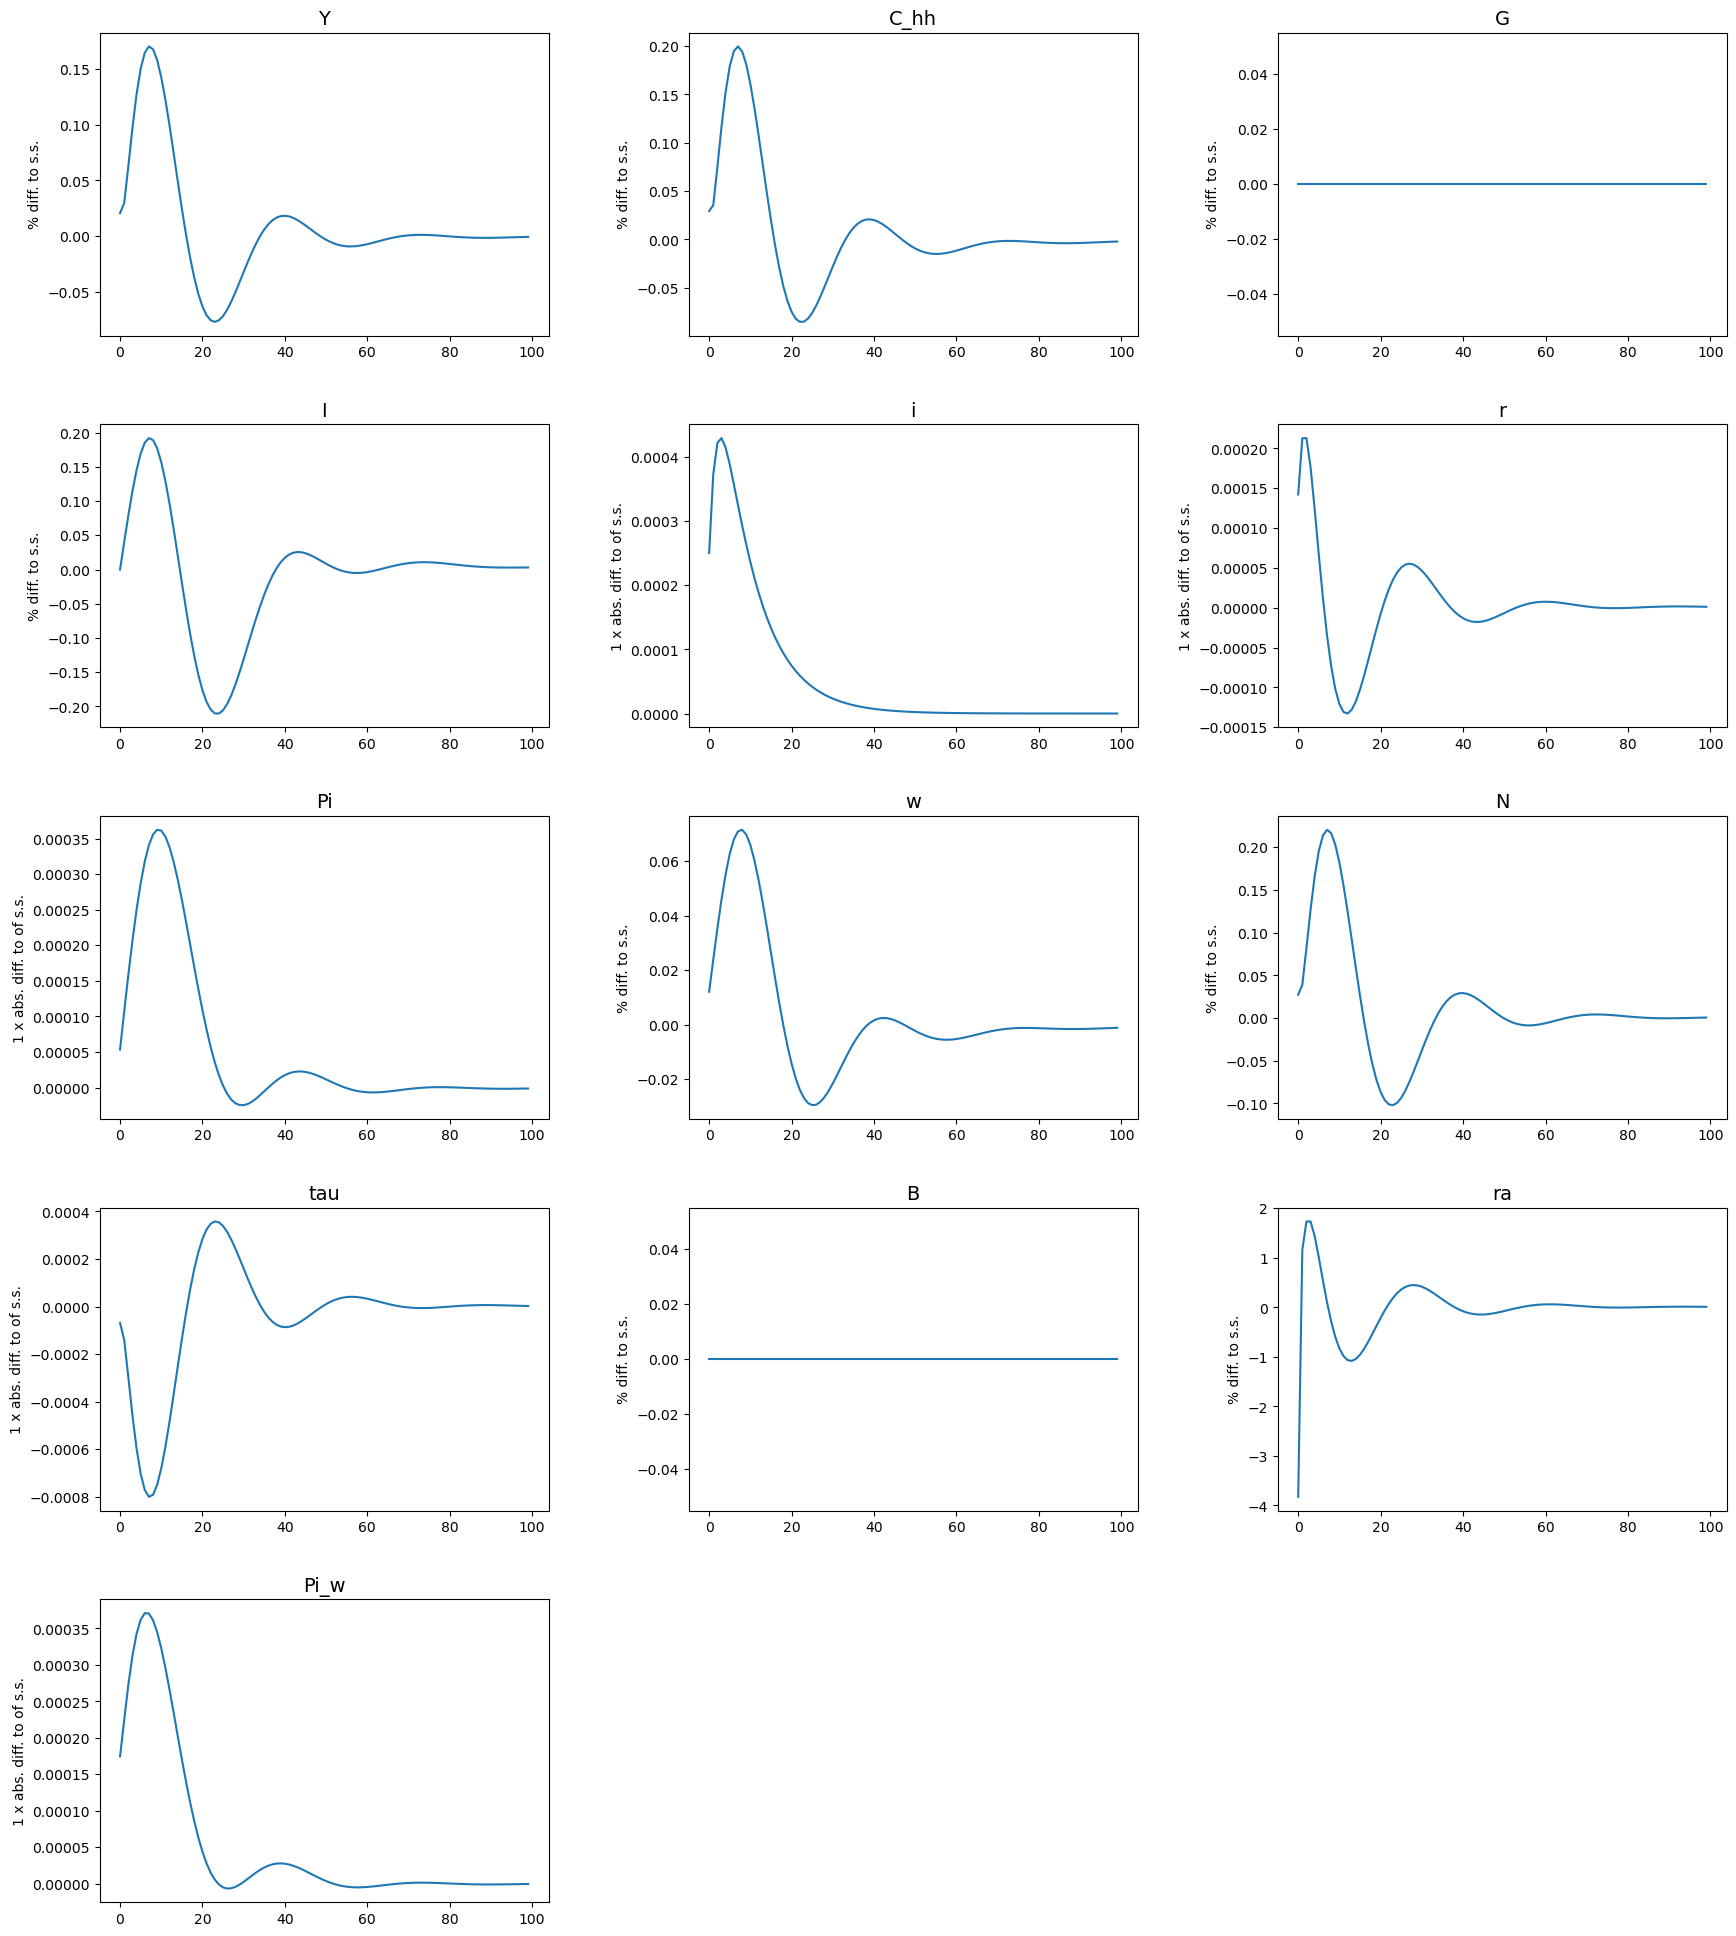


### tagets ###


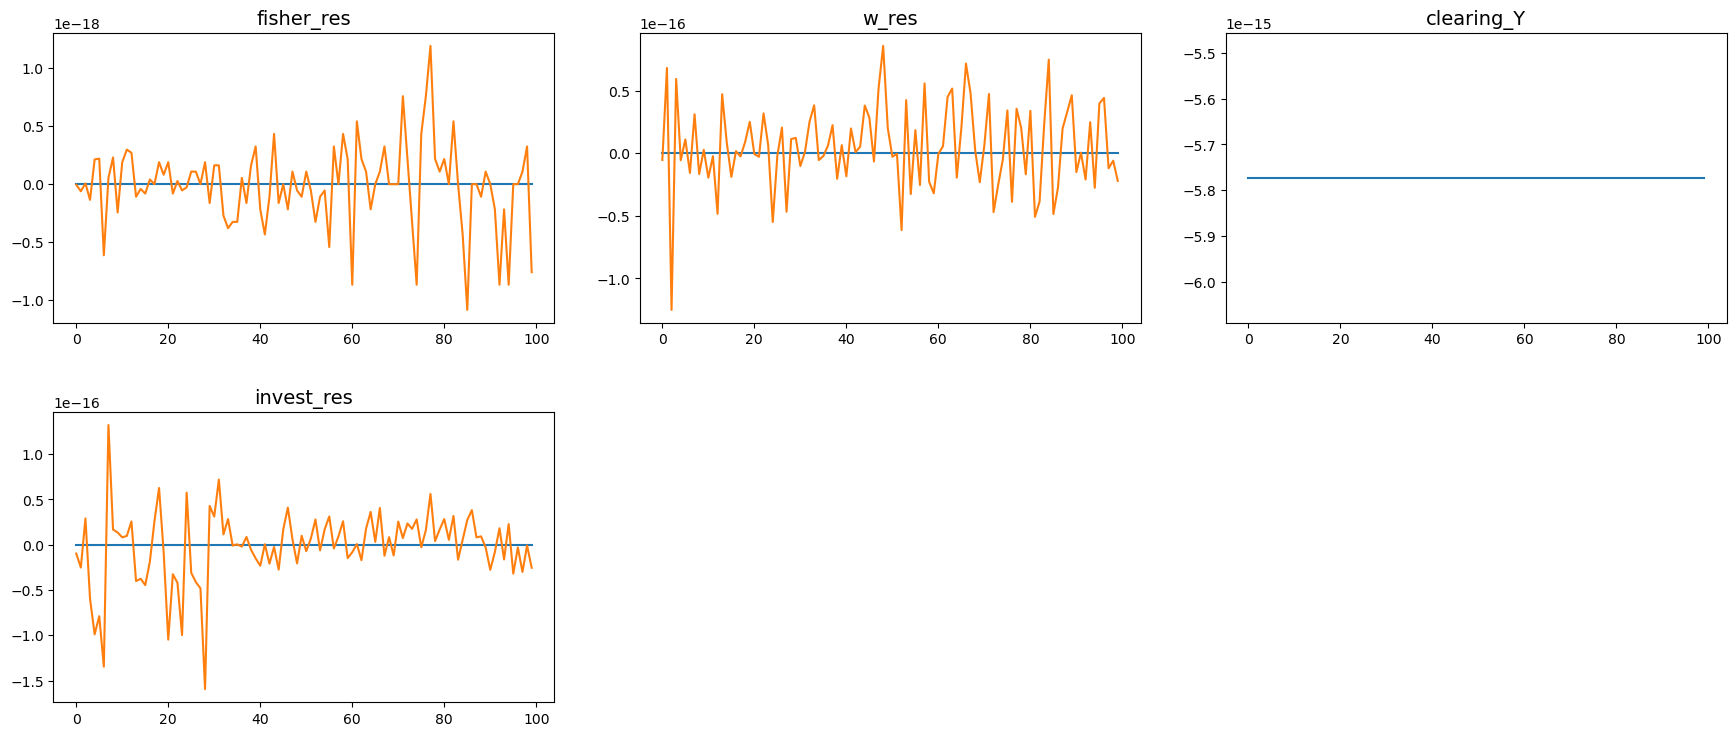

In [20]:
models = [model]
labels = ['baseline no sticky',]
paths = ['Y', 'C_hh', 'G', 'I', 'i', 'r', 'Pi', 'w', 'N', 'tau', 'B','ra', 'Pi_w']
paths_short = ['Y', 'C_hh', 'Pi']
lvl_value = ['eg', 'ez', 'em', 'eg_transfer', 'd_tau', 'd_B', 'd_G','eB','etau','eG']
abs_diff = ['tau',  'r', 'Pi', 'i', 'rk','Pi_w']
# facs = {'r':100}
model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=False)
model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=100,do_linear=True,do_shocks=True, do_non_linear=False)

# Tests

In [79]:
IRF_full = deepcopy(model.IRF)
# path_full = model.path.__dict__.copy()

In [80]:
model.blocks = [
            'blocks.production_firm',
            'blocks.price_setters',
            'blocks.mutual_fund',
            'blocks.government_constant_Z',
            'hh',
            'blocks.union',
            'blocks.taylor',
            'blocks.invest_residual',
            'blocks.fisher',
            'blocks.real_wage',
            'blocks.market_clearing']
# model.par.rho_m = 0.89
# model.par.phi_pi = 0.0
# model.par.phi_G = 1.0

In [81]:
# model.compute_jacs(do_print=True)
# model.par.phi_K = 1e20
# model.par.kappa = 0.0
# model.par.kappa_w = 0.0
model._compute_jac(inputs='unknowns',do_print=True)
model._compute_jac(inputs='shocks',do_print=True)

full Jacobian to unknowns computed in 3.0 secs [in evaluate_blocks(): 1.7 secs]
full Jacobian to shocks computed in 3.2 secs [in evaluate_blocks(): 1.9 secs]


In [82]:
model.find_IRFs(shocks=['eg'])

### shocks ###


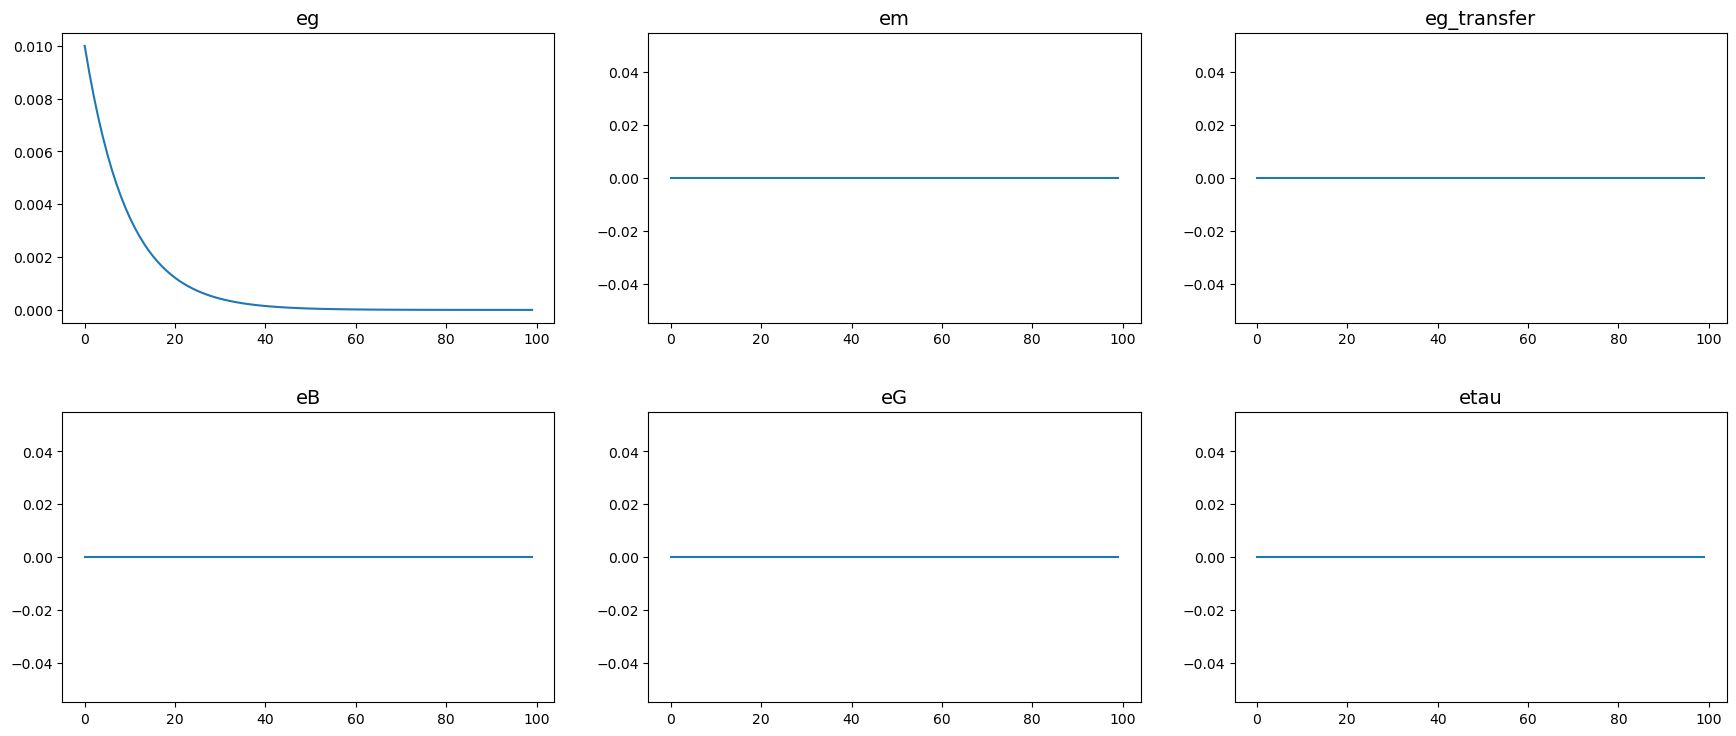


### varnames ###


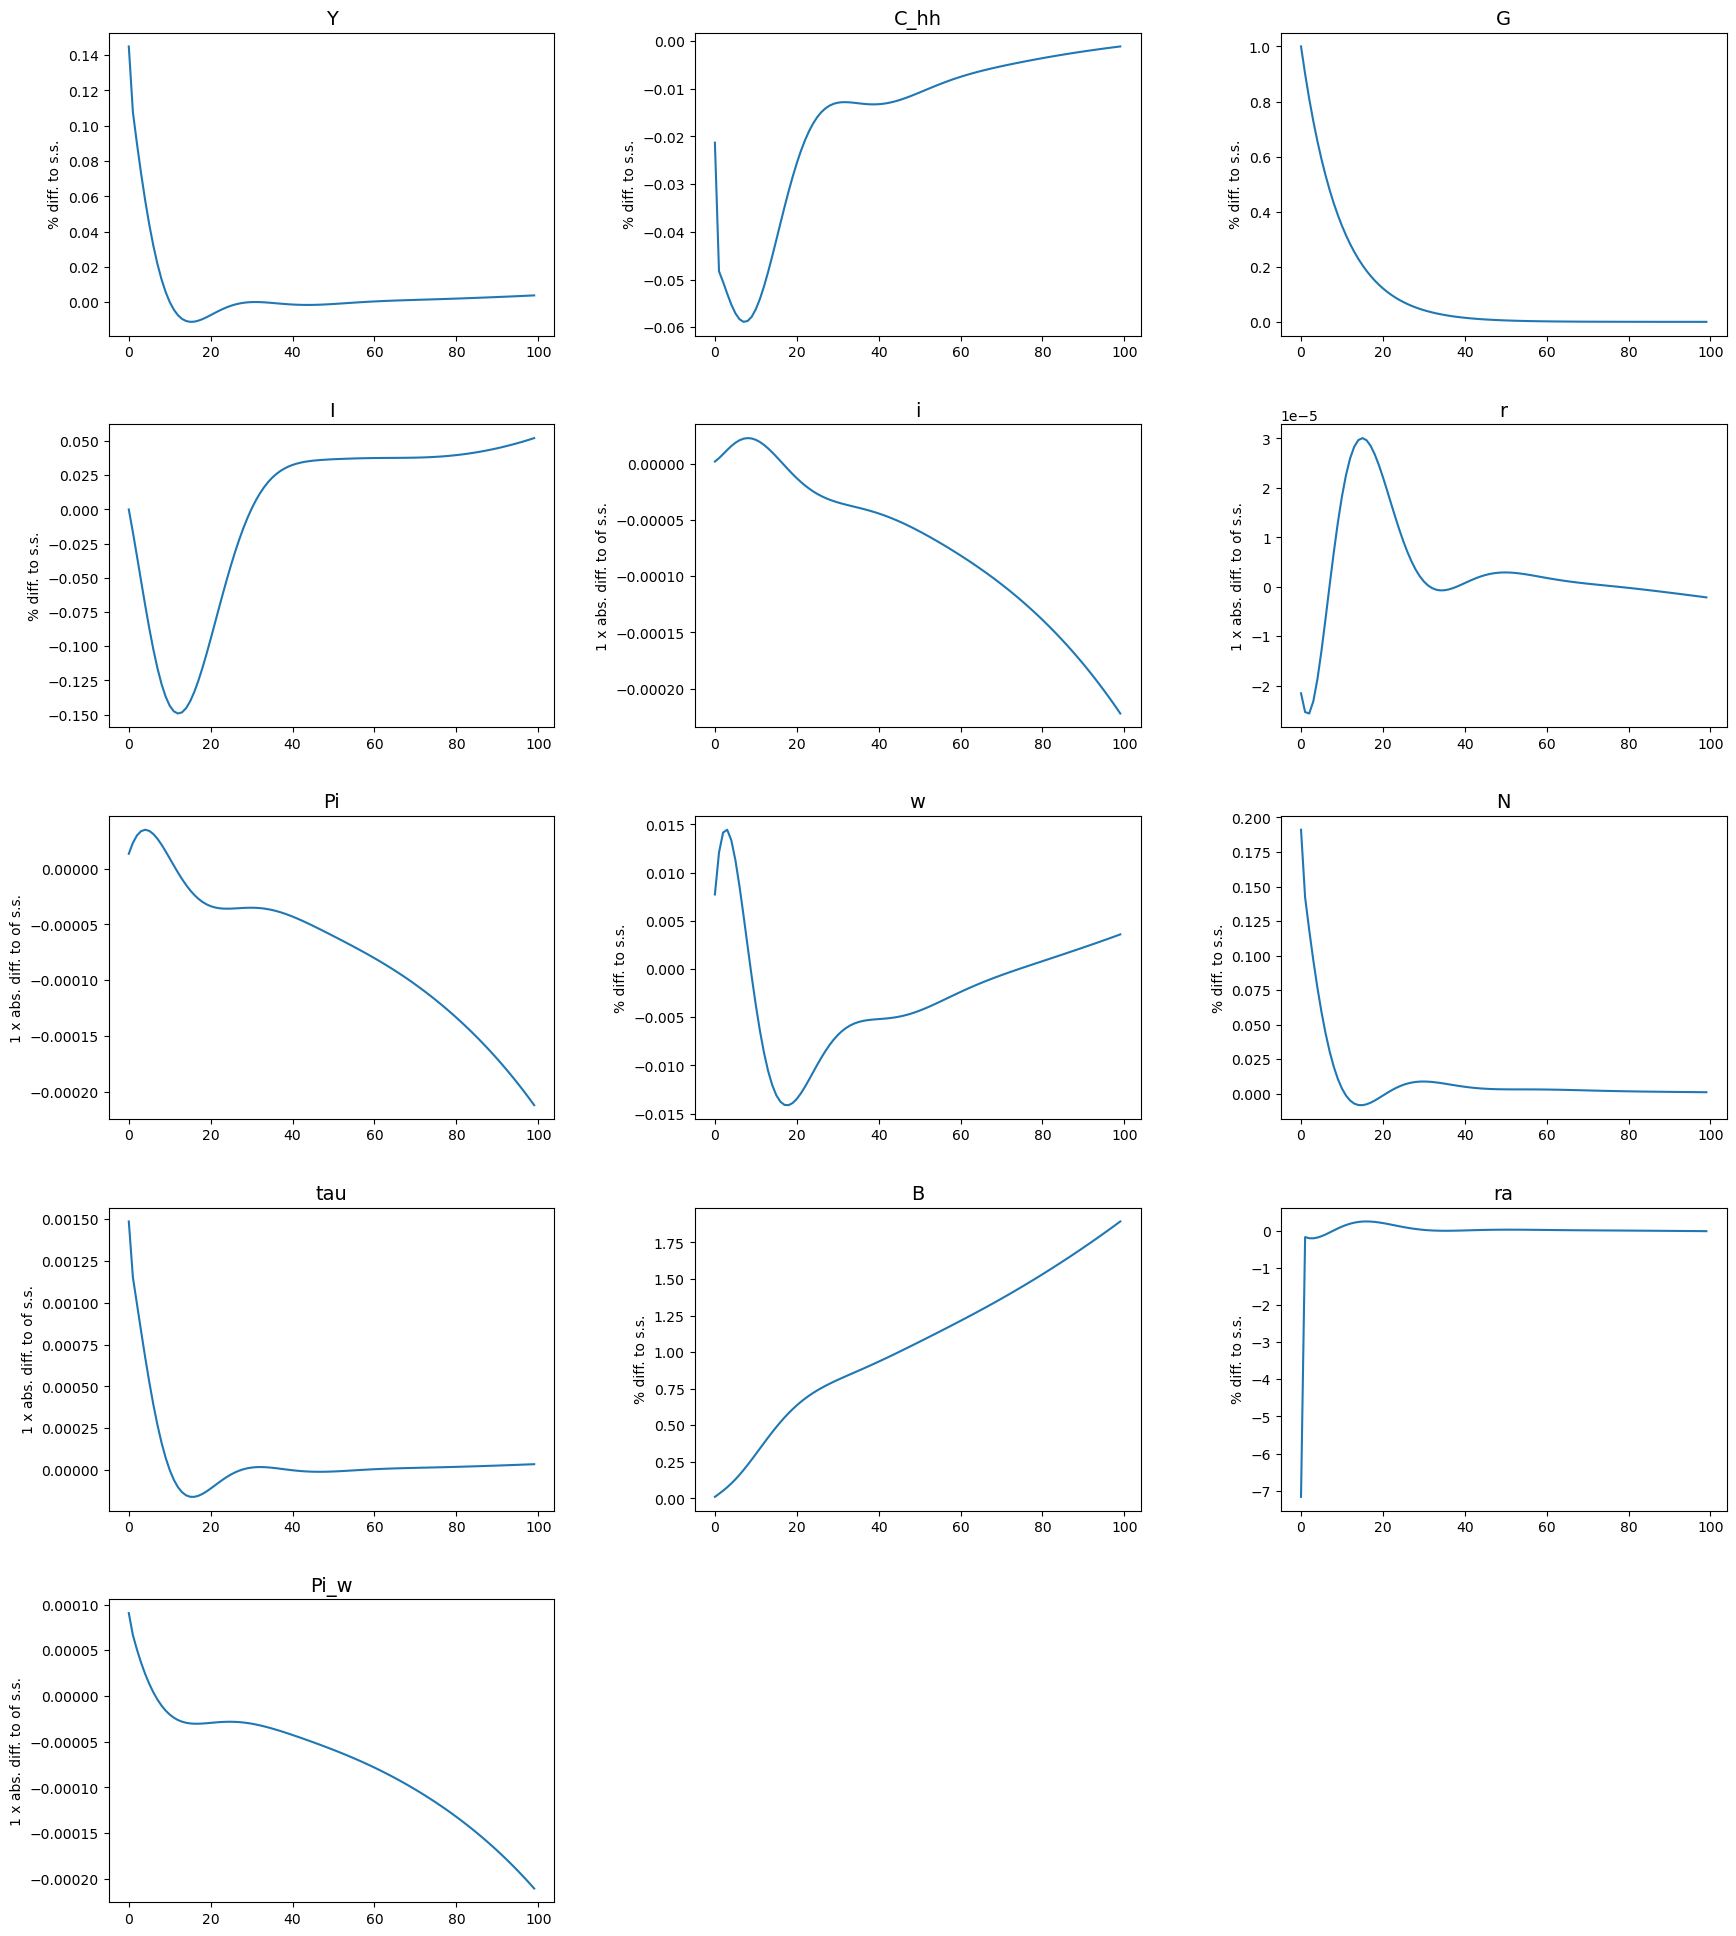


### tagets ###


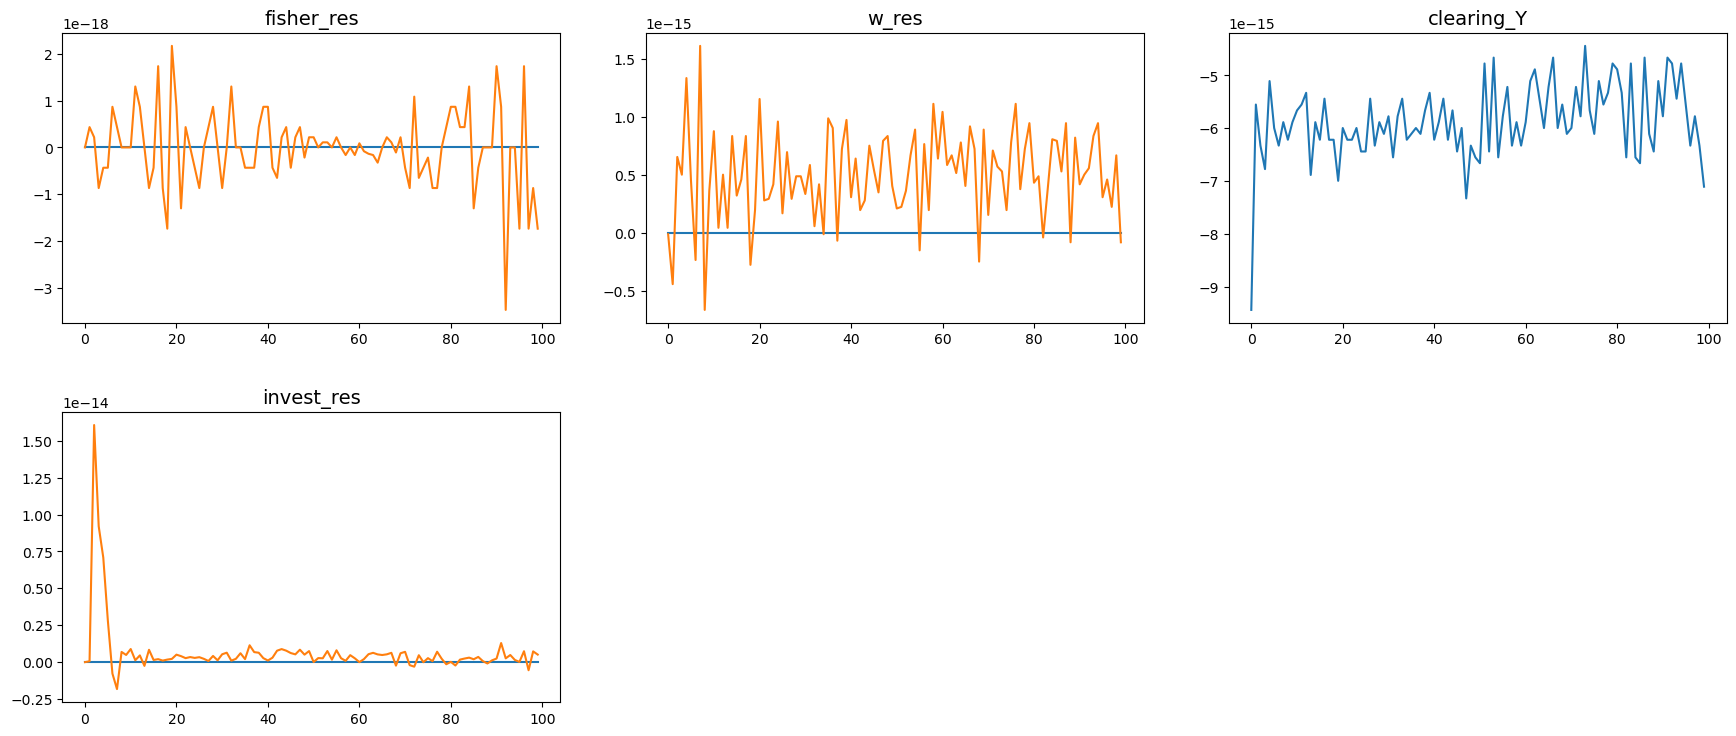

In [85]:
model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=100,do_linear=True,do_shocks=True, do_non_linear=False)

In [246]:
# dB = IRF_full['B']
# dtau = IRF_full['tau']
# dG = IRF_full['G']
# model.find_IRFs(shocks={'deG': dG})
# IRF_eG = deepcopy(model.IRF)
#
# model.find_IRFs(shocks={'detau': dtau})
# IRF_etau = deepcopy(model.IRF)
#
# model.find_IRFs(shocks={'deB': dB})
# IRF_eB = deepcopy(model.IRF)
# IRF_eB = {k:IRF_full[k] - IRF_eG[k] - IRF_etau[k] for k in IRF_full.keys()}

# fig,ax = plt.subplots()
# T_max = 100
# ax.plot(np.arange(T_max), IRF_eB['Y'][:T_max], label='eB')
# ax.plot(np.arange(T_max), IRF_eG['Y'][:T_max], label='eG')
# ax.plot(np.arange(T_max), IRF_etau['Y'][:T_max], label='etau')
# ax.plot(np.arange(T_max), IRF_full['Y'][:T_max], label='full')
# ax.plot(np.arange(T_max), IRF_full['Y'][:T_max] - (IRF_etau['Y'][:T_max] + IRF_eG['Y'][:T_max]), label='Diff')
# ax.legend()

In [29]:
zero = []
non_zero = []
for key, value in model.jac.items():
    if np.all(value == 0.0):
        zero.append(key)
    else:
        non_zero.append(key)
print(f'zero: {zero}')
print('')
print(f'non zero: {non_zero}')

zero: [('A', 'em'), ('A', 'eB'), ('A', 'eG'), ('A', 'etau'), ('B', 'em'), ('B', 'eB'), ('B', 'eG'), ('B', 'etau'), ('clearing_A', 'em'), ('clearing_A', 'eB'), ('clearing_A', 'eG'), ('clearing_A', 'etau'), ('clearing_MPC', 'r'), ('clearing_MPC', 'w'), ('clearing_MPC', 'Y'), ('clearing_MPC', 'Ip'), ('clearing_MPC', 'eg'), ('clearing_MPC', 'em'), ('clearing_MPC', 'eg_transfer'), ('clearing_MPC', 'eB'), ('clearing_MPC', 'eG'), ('clearing_MPC', 'etau'), ('clearing_L', 'r'), ('clearing_L', 'w'), ('clearing_L', 'Y'), ('clearing_L', 'Ip'), ('clearing_L', 'eg'), ('clearing_L', 'em'), ('clearing_L', 'eg_transfer'), ('clearing_L', 'eB'), ('clearing_L', 'eG'), ('clearing_L', 'etau'), ('clearing_wealth', 'em'), ('clearing_wealth', 'eB'), ('clearing_wealth', 'eG'), ('clearing_wealth', 'etau'), ('clearing_Y', 'r'), ('clearing_Y', 'w'), ('clearing_Y', 'em'), ('clearing_Y', 'eg_transfer'), ('clearing_Y', 'eB'), ('clearing_Y', 'eG'), ('clearing_Y', 'etau'), ('Div_int', 'r'), ('Div_int', 'eg'), ('Div_int

In [205]:
# shock_dict = {
#     # 'deG': dG,
#     'detau': dtau,
#     # 'deB': dB
# }
# model.find_IRFs(shocks=shock_dict)
# # paths = ['Y', 'C_hh', 'G', 'I', 'r', 'Pi', 'tau', 'Z', 'q', 'B']
# # model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=False)
# # model
# IRF_tau = model.IRF

In [252]:
print(model.unknowns)
print(model.shocks)
test_jacs = deepcopy(model.jac)
for i_shock,shockname in enumerate(model.shocks):
    for i_unknown, unknownname in enumerate(model.unknowns):
        test_jacs[(unknownname, shockname)] = model.G_U[i_unknown*par.T:(i_unknown+1)*par.T,
                                              i_shock*par.T:(i_shock+1)*par.T]

['r', 'w', 'Y', 'Ip']
['eg', 'em', 'eg_transfer', 'eB', 'eG', 'etau']


In [261]:
test_jacs[('Ip', 'etau')]

array([[-7.57806278e-04, -7.35158081e-04, -8.36730547e-04, ...,
        -2.26989160e-06, -2.12820652e-06, -1.97111615e-06],
       [-1.01150431e-03, -9.71690440e-04, -1.06731842e-03, ...,
        -3.77093073e-06, -3.53629901e-06, -3.27564285e-06],
       [-8.20417184e-04, -7.71847709e-04, -8.62705455e-04, ...,
        -4.56401999e-06, -4.28129986e-06, -3.96635442e-06],
       ...,
       [ 5.13934511e+00,  5.13586394e+00,  5.12116617e+00, ...,
         1.48569702e-02,  1.36524909e-02,  1.23471518e-02],
       [ 3.64167420e+00,  3.63920749e+00,  3.62879284e+00, ...,
         1.06467526e-02,  9.79898784e-03,  8.87389857e-03],
       [ 1.92665174e+00,  1.92534671e+00,  1.91983677e+00, ...,
         5.69084540e-03,  5.24644764e-03,  4.75871971e-03]])

# Misc

In [207]:
# model2 = HANKStickyModelClass(name='baseline')
# model2.load()
# for key, value in model2.par.__dict__.items():
#     model.par.__dict__[key] = value
# for key, value in model2.ss.__dict__.items():
#     model.ss.__dict__[key] = value
# model.ss.__dict__['Kd'] = model.ss.__dict__['K']
# model.ss.__dict__['clearing_K'] = model.ss.__dict__['clearing_Y']

In [208]:
# model.print_unpack_varlist()

In [209]:
# model.check_non_lin(0)

In [210]:
# print(np.max(path.A - path.A_hh))